In [1]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

## Data Preprocessing

In [2]:
df = pd.read_csv('Resources/Datasets/General_factor_data/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv', skiprows=4)
df

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [3]:
df = df.rename(columns={'Month':'Date',
    'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon':'All_grade_price($/gallon)'})
df

,Date,All_grade_price($/gallon)
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,All_grade_price($/gallon)
Date,
2022-04-01,4.213
2022-03-01,4.322
2022-02-01,3.611
2022-01-01,3.413
2021-12-01,3.406
...,...
1993-08-01,1.062
1993-07-01,1.078
1993-06-01,1.097


In [5]:
df = df.sort_index()
df

,All_grade_price($/gallon)
Date,
1993-04-01,1.078
1993-05-01,1.100
1993-06-01,1.097
1993-07-01,1.078
1993-08-01,1.062
...,...
2021-12-01,3.406
2022-01-01,3.413
2022-02-01,3.611


### Plot the data see the trend

Text(0.5, 1.0, 'Time Series of All_grade_Price')

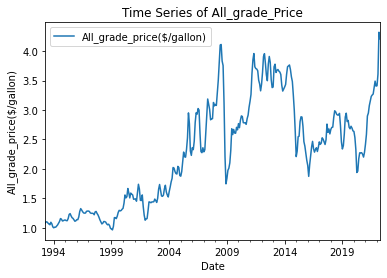

In [6]:
#plot to see data relationship
df.plot()
plt.ylabel('All_grade_price($/gallon)')
plt.title('Time Series of All_grade_Price')

### Check Time Series dataset --Stationarity?

In [7]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['All_grade_price($/gallon)'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('p-value: ', dftest[1])
print('Number of Lags: ', dftest[2])
#check the data if it is stationarity.P-value is 0.67 which is greater than 0.05, 
#which means data is accepting the null hypothesis, which means data is non-stationary. 

ADF:  -1.2044463464356066
p-value:  0.6716800871621458
Number of Lags:  10


## ARIMA Model

In [8]:
# build the arima model, find the min. AIC.
##Akaike's Information Criterion (AIC), which was useful in selecting predictors for regression, 
##is also useful for determining the order of an ARIMA model

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

arima_df = auto_arima(df['All_grade_price($/gallon)'], trace=True, suppress_warnings=True)

print(arima_df.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-442.257, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-347.863, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-423.155, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-433.155, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-348.540, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-429.155, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-441.403, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-438.141, Time=0.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-439.744, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-434.644, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-442.926, Time=0.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-436.562, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-440.260, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-436.293, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

In [10]:
### Best Model for ARIMA is (1,1,3), and shows non-seasonal dataset.
#### SARIMAX is for seasonal dataset

### Split data to train and test

In [11]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(349, 1)
(319, 1) (30, 1)


In [12]:
#create arima model and fit the dataset.
model = sm.tsa.arima.ARIMA(df['All_grade_price($/gallon)'], order=(1, 1, 3))
model_b = model.fit()
print(model_b.summary())

                                   SARIMAX Results                                   
Dep. Variable:     All_grade_price($/gallon)   No. Observations:                  349
Model:                        ARIMA(1, 1, 3)   Log Likelihood                 226.673
Date:                       Wed, 01 Jun 2022   AIC                           -443.345
Time:                               16:42:54   BIC                           -424.084
Sample:                           04-01-1993   HQIC                          -435.677
                                - 04-01-2022                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7499      0.101      7.408      0.000       0.552       0.948
ma.L1         -0.2166      0.106     -2.038      0.042      -0.425      -0.

### Plot Residual graphs

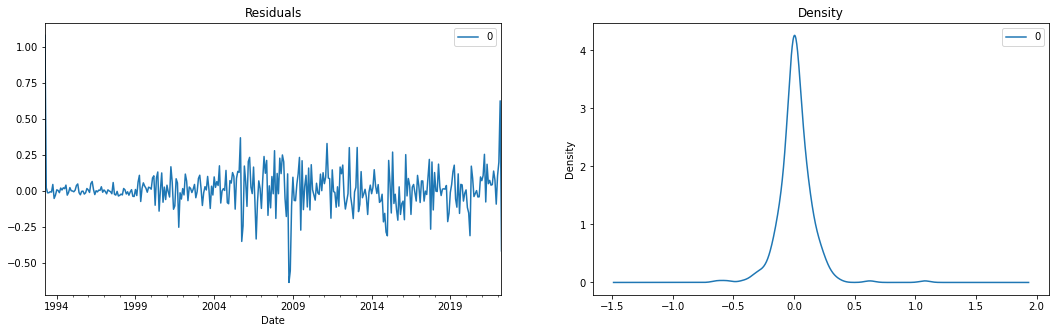

In [13]:
#plot the residual errors
res = pd.DataFrame(model_b.resid)
fig,ax = plt.subplots(1,2)
res.plot(title='Residuals', ax=ax[0], figsize=(18,5))
res.plot(kind='kde',title='Density', ax=ax[1])
plt.show()

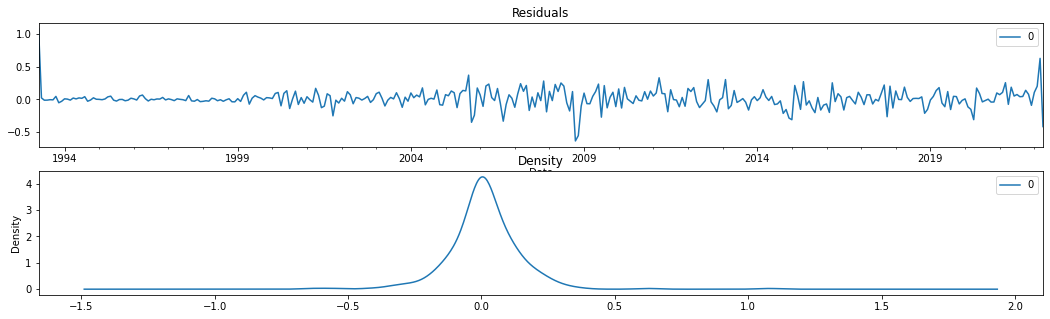

In [14]:
#change to horizontal
res = pd.DataFrame(model_b.resid)
fig,ax = plt.subplots(2,1)
res.plot(title='Residuals', ax=ax[0], figsize=(18,5))
res.plot(kind='kde',title='Density', ax=ax[1])
plt.show()

### Make a prediction

In [15]:
start = len(train)
end = len(train)+len(test)-1
pred = model_b.predict(start = start, end=end, typ='levels')
print(pred)

2019-11-01    2.762818
2019-12-01    2.660564
2020-01-01    2.628256
2020-02-01    2.647393
2020-03-01    2.481009
2020-04-01    2.247584
2020-05-01    1.788804
2020-06-01    2.081071
2020-07-01    2.310516
2020-08-01    2.290173
2020-09-01    2.271210
2020-10-01    2.289201
2020-11-01    2.240178
2020-12-01    2.186624
2021-01-01    2.348499
2021-02-01    2.480508
2021-03-01    2.644015
2021-04-01    3.024067
2021-05-01    2.890759
2021-06-01    3.106437
2021-07-01    3.157270
2021-08-01    3.214680
2021-09-01    3.227945
2021-10-01    3.245877
2021-11-01    3.414296
2021-12-01    3.496996
2022-01-01    3.306609
2022-02-01    3.411452
2022-03-01    3.697541
2022-04-01    4.627894
Freq: MS, Name: predicted_mean, dtype: float64


In [16]:
#pred.index=df.index[start:end+1]
#print(pred)

<AxesSubplot:xlabel='Date'>

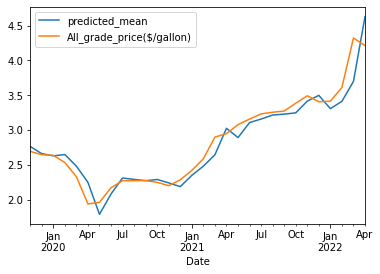

In [17]:
pred.plot(legend=True)
test['All_grade_price($/gallon)'].plot(legend=True)


In [18]:
rmse = sqrt(mean_squared_error(pred, test))
print('rmse: ', rmse)

rmse:  0.17967321307294296


In [19]:
test.mean()

All_grade_price($/gallon)    2.837967
dtype: float64

In [20]:
### Compare the rmse and the mean of the dataset, it is a good model

In [21]:
import sklearn.metrics as skm
print('MAE =', round(skm.mean_absolute_error(test, pred), 2))
print("MSE =", round(skm.mean_squared_error(test, pred), 2)) 
print("MAE =", round(skm.median_absolute_error(test, pred), 2)) 
print("EVS =", round(skm.explained_variance_score(test, pred), 2)) 
print("R2 score =", round(skm.r2_score(test, pred), 2))

MAE = 0.12
MSE = 0.03
MAE = 0.08
EVS = 0.92
R2 score = 0.92


## Make a Prediction for future gas price

In [22]:
#check the latest data we have
df.tail()

,All_grade_price($/gallon)
Date,
2021-12-01,3.406
2022-01-01,3.413
2022-02-01,3.611
2022-03-01,4.322
2022-04-01,4.213


In [23]:
#model set up
model_recent = sm.tsa.arima.ARIMA(df['All_grade_price($/gallon)'], order=(1,1,3))
model_rf = model_recent.fit()

In [24]:
#predict the next half yr gas price: from April to December 2022
index_pred = pd.period_range(start='2022-04-01', end='2022-12-01', freq='M')
#print(index_pred)
pred = model_rf.predict(start=len(df), end=len(df)+8, typ='levels',dynamic=False).rename('ARIMA Recent Prediction')
pred.index = index_pred
print('The future prediction for the rest of year: ')
print(pred)

The future prediction for the rest of year: 
2022-04    3.960487
2022-05    3.788744
2022-06    3.745202
2022-07    3.712550
2022-08    3.688064
2022-09    3.669702
2022-10    3.655933
2022-11    3.645607
2022-12    3.637864
Freq: M, Name: ARIMA Recent Prediction, dtype: float64


Text(0.5, 1.0, 'All Grades Gasoline Prediction for 2022')

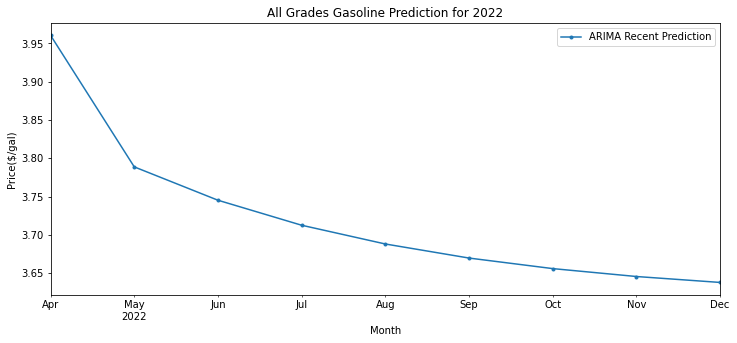

In [28]:
pred.plot(figsize=(12,5), legend=True, style='.-')
plt.xlabel('Month')
plt.ylabel('Price($/gal)')
plt.title('All Grades Gasoline Prediction for 2022')